In [4]:
# Install dependencies as needed:
# pip install kagglehub pandas
import kagglehub
import pandas as pd
import os

# Step 1: 데이터셋 다운로드
# print("데이터셋 다운로드 중...")
path = kagglehub.dataset_download("nathansmallcalder/lol-match-history-and-summoner-data-80k-matches")
# print(f"데이터셋 경로: {path}")

# Step 2: 다운로드된 파일 목록 확인
print("\n사용 가능한 파일:")
files = os.listdir(path)
for f in files:
    print(f"  - {f}")

# Step 3: CSV 파일 찾기
csv_files = [f for f in files if f.endswith('.csv')]
if not csv_files:
    print("\nCSV 파일을 찾을 수 없습니다.")
    exit()


사용 가능한 파일:
  - RankTbl.csv
  - MatchStatsTbl.csv
  - MatchTbl.csv
  - ChampionTbl.csv
  - SummonerMatchTbl.csv
  - TeamMatchTbl.csv
  - ItemTbl.csv


In [5]:
# ------------------------------------------------------------
# [0]. RankTbl.csv (11 rows, 2 columns)
# - 랭크 정보 테이블
#
# 컬럼:
#   - RankId: 랭크 고유 ID (0~10)
#   - RankName: 랭크 이름 (Unranked, Iron, Bronze, Silver, Gold,
#               Platinum, Emerald, Diamond, Master, Grandmaster, Challenger)
#
# 용도: MatchTbl의 RankFk와 조인하여 매치 랭크 정보 확인
# ------------------------------------------------------------
print(f"\n[0]번째 CSV 파일 로드: {csv_files[0]}")
df_0 = pd.read_csv(os.path.join(path, csv_files[0]))
print(f"\n데이터 크기: {df_0.shape}")
print("\nFirst 5 records:")
print(df_0.head())


[0]번째 CSV 파일 로드: RankTbl.csv

데이터 크기: (11, 2)

First 5 records:
   RankId  RankName
0       0  Unranked
1       1      Iron
2       2    Bronze
3       3    Silver
4       4      Gold



[1]번째 CSV 파일 로드: MatchStatsTbl.csv

데이터 크기: (78863, 31)

First 5 records:
   MatchStatsId  SummonerMatchFk  MinionsKilled  DmgDealt  DmgTaken  \
0             1                1             30      4765     12541   
1             2                2             29      8821     14534   
2             3                3             34      6410     19011   
3             4                4             51     22206     14771   
4             5                5              0     39106     33572   

   TurretDmgDealt  TotalGold    Lane  Win  item1  ...  PrimarySlot3  \
0               0       7058  BOTTOM    0   3870  ...          8453   
1               1       9618  BOTTOM    0   3870  ...          8453   
2               3       9877  BOTTOM    1   3870  ...          8237   
3               3      12374    NONE    1   6655  ...          8106   
4               0      15012     TOP    1   4015  ...             0   

   SecondarySlot1  SecondarySlot2  SummonerSpell1  SummonerSpell2  \
0 

array([[<Axes: title={'center': 'MatchStatsId'}>,
        <Axes: title={'center': 'SummonerMatchFk'}>,
        <Axes: title={'center': 'MinionsKilled'}>,
        <Axes: title={'center': 'DmgDealt'}>,
        <Axes: title={'center': 'DmgTaken'}>],
       [<Axes: title={'center': 'TurretDmgDealt'}>,
        <Axes: title={'center': 'TotalGold'}>,
        <Axes: title={'center': 'Win'}>,
        <Axes: title={'center': 'item1'}>,
        <Axes: title={'center': 'item2'}>],
       [<Axes: title={'center': 'item3'}>,
        <Axes: title={'center': 'item4'}>,
        <Axes: title={'center': 'item5'}>,
        <Axes: title={'center': 'item6'}>,
        <Axes: title={'center': 'kills'}>],
       [<Axes: title={'center': 'deaths'}>,
        <Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'PrimaryKeyStone'}>,
        <Axes: title={'center': 'PrimarySlot1'}>,
        <Axes: title={'center': 'PrimarySlot2'}>],
       [<Axes: title={'center': 'PrimarySlot3'}>,
        <Axes: ti

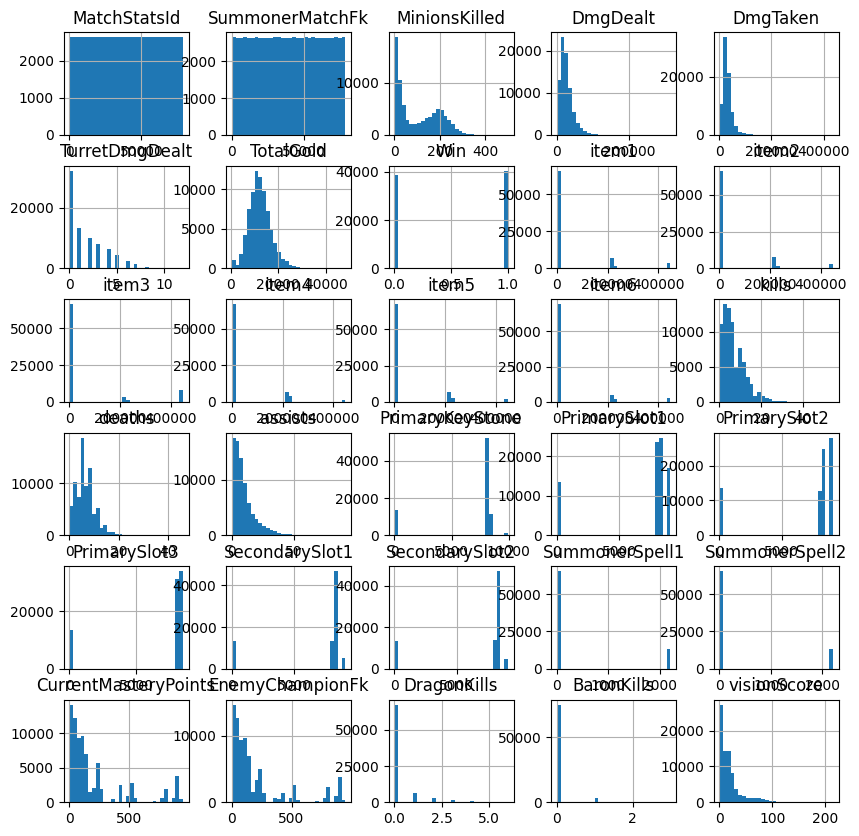

In [8]:
# ------------------------------------------------------------
# [1]. MatchStatsTbl.csv (78,863 rows, 31 columns)
# - 플레이어별 게임 통계 (78k 플레이어 기록)
#
# 주요 컬럼:
#   ▶ 식별자
#     - MatchStatsId: 통계 레코드 고유 ID
#     - SummonerMatchFk: SummonerMatchTbl 외래키
#     - EnemyChampionFk: 상대 챔피언 ID
#
#   ▶ 게임 통계 (승패 예측 특성)
#     - MinionsKilled: 처치한 미니언 수 (CS)
#     - DmgDealt: 가한 총 데미지
#     - DmgTaken: 받은 총 데미지
#     - TurretDmgDealt: 타워에 가한 데미지
#     - TotalGold: 획득한 총 골드
#     - kills: 킬 수
#     - deaths: 데스 수
#     - assists: 어시스트 수
#     - DragonKills: 드래곤 처치 기여
#     - BaronKills: 바론 처치 기여
#     - visionScore: 시야 점수
#
#   ▶ 게임 정보
#     - Lane: 포지션 (TOP, JUNGLE, MIDDLE, BOTTOM, UTILITY)
#     - Win: 승패 (0: 패배, 1: 승리) 
#
#   ▶ 빌드 정보
#     - item1~item6: 장착한 아이템 ID
#     - PrimaryKeyStone: 주 룬 핵심 룬
#     - PrimarySlot1~3: 주 룬 슬롯
#     - SecondarySlot1~2: 보조 룬 슬롯
#     - SummonerSpell1~2: 소환사 주문 ID
#
#   ▶ 챔피언 숙련도
#     - CurrentMasteryPoints: 현재 챔피언 숙련도 점수
#
# 용도: 지도학습 - 승패 예측 (분류), KDA 예측 (회귀)
# ------------------------------------------------------------

df_1 = pd.read_csv(os.path.join(path, csv_files[1]))
print(f"\n[1]번째 CSV 파일 로드: {csv_files[1]}")
print(f"\n데이터 크기: {df_1.shape}")
print("\nFirst 5 records:")
print(df_1.head())

df_1.describe()
df_1.hist(figsize=(10, 10), bins=30)

In [ ]:
# ------------------------------------------------------------
# [2]. MatchTbl.csv (35,421 rows, 5 columns)
# - 매치 메타 정보
#
# 컬럼:
#   - MatchId: 매치 고유 ID (예: EUW1_6681382047)
#   - Patch: 게임 패치 버전 (예: 13.22.541.9804)
#   - QueueType: 게임 모드 (CLASSIC: 소환사의 협곡)
#   - RankFk: 랭크 ID (RankTbl 외래키)
#   - GameDuration: 게임 시간 (초 단위)
#
# 용도: 매치별 메타 정보, 게임 시간 분석
# ------------------------------------------------------------

df_2 = pd.read_csv(os.path.join(path, csv_files[2]))
print(f"\n[2]번째 CSV 파일 로드: {csv_files[2]}")
print(f"\n데이터 크기: {df_2.shape}")
print("\nFirst 5 records:")
print(df_2.head())

In [ ]:

# ------------------------------------------------------------
# [3]. ChampionTbl.csv (172 rows, 2 columns)
# - 챔피언 정보
#
# 컬럼:
#   - ChampionId: 챔피언 고유 ID
#   - ChampionName: 챔피언 이름 (예: Annie, Yasuo, Zed)
#
# 용도: SummonerMatchTbl의 ChampionFk와 조인하여 챔피언 이름 확인
# ------------------------------------------------------------

df_3 = pd.read_csv(os.path.join(path, csv_files[3]))
print(f"\n[3]번째 CSV 파일 로드: {csv_files[3]}")
print(f"\n데이터 크기: {df_3.shape}")
print("\nFirst 5 records:")
print(df_3.head())

In [ ]:
# ------------------------------------------------------------
# [4]. SummonerMatchTbl.csv (78,863 rows, 4 columns)
# - 소환사(플레이어)와 매치 연결 테이블
#
# 컬럼:
#   - SummonerMatchId: 레코드 고유 ID
#   - SummonerFk: 소환사 ID
#   - MatchFk: 매치 ID (MatchTbl 외래키)
#   - ChampionFk: 사용한 챔피언 ID (ChampionTbl 외래키)
#
# 용도: 플레이어-매치-챔피언 관계 연결
# ------------------------------------------------------------

df_4 = pd.read_csv(os.path.join(path, csv_files[4]))
print(f"\n[4]번째 CSV 파일 로드: {csv_files[4]}")
print(f"\n데이터 크기: {df_4.shape}")
print("\nFirst 5 records:")
print(df_4.head())

In [ ]:
# ------------------------------------------------------------
# [5]. TeamMatchTbl.csv (35,045 rows, 24 columns)
# - 팀별 매치 정보 (블루팀 vs 레드팀)
#
# 컬럼:
#   ▶ 식별자
#     - TeamID: 팀 매치 고유 ID
#     - MatchFk: 매치 ID (MatchTbl 외래키)
#
#   ▶ 챔피언 픽/밴
#     - B1Champ~B5Champ: 블루팀 챔피언 5명
#     - R1Champ~R5Champ: 레드팀 챔피언 5명
#
#   ▶ 팀 통계
#     - BlueBaronKills: 블루팀 바론 처치 수
#     - BlueRiftHeraldKills: 블루팀 전령 처치 수
#     - BlueDragonKills: 블루팀 드래곤 처치 수
#     - BlueTowerKills: 블루팀 타워 파괴 수
#     - BlueKills: 블루팀 총 킬 수
#     - RedBaronKills: 레드팀 바론 처치 수
#     - RedRiftHeraldKills: 레드팀 전령 처치 수
#     - RedDragonKills: 레드팀 드래곤 처치 수
#     - RedTowerKills: 레드팀 타워 파괴 수
#     - RedKills: 레드팀 총 킬 수
#
#   ▶ 승패
#     - RedWin: 레드팀 승리 여부 (0/1)
#     - BlueWin: 블루팀 승리 여부 (0/1)
#
# 용도: 팀 레벨 분석, 챔피언 조합 분석, 오브젝트 중요도 분석
# ------------------------------------------------------------

df_5 = pd.read_csv(os.path.join(path, csv_files[5]))
print(f"\n[5]번째 CSV 파일 로드: {csv_files[5]}")
print(f"\n데이터 크기: {df_5.shape}")
print("\nFirst 5 records:")
print(df_5.head())

In [ ]:
# ------------------------------------------------------------
# [6]. ItemTbl.csv (635 rows, 2 columns)
# - 아이템 정보
#
# 컬럼:
#   - ItemID: 아이템 고유 ID
#   - ItemName: 아이템 이름 (예: Boots, Infinity Edge)
#
# 용도: MatchStatsTbl의 item1~6와 조인하여 아이템 이름 확인
# ------------------------------------------------------------
df_6 = pd.read_csv(os.path.join(path, csv_files[6]))
print(f"\n[6]번째 CSV 파일 로드: {csv_files[6]}")
print(f"\n데이터 크기: {df_6.shape}")
print("\nFirst 5 records:")
print(df_6.head())

NameError: name 'pd' is not defined